todd-5530-A1.

Author: Reagan Todd

Date: 2025-09-19

Purpose: To clean and manipulate data using python.

Copyright: for educational purposes only.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1


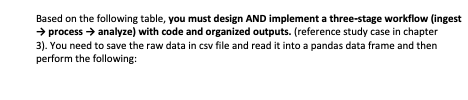


importing pandas and opening the csv data file. Then removed the spacing after each word, changed the data types for the age, weight, height, and grip strength variables:

In [1]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/5530/raw_data/5530_Assignment1.csv")
print(df.head())

df.isnull().values.any()

df.columns = df.columns.str.strip()


df[["Height", "Weight", "Grip strength"]] = df[["Height", "Weight", "Grip strength"]].astype(float)
df["Age"]=df["Age"].astype(int)
print(df.dtypes)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/5530/raw_data/5530_Assignment1.csv'

creating proper variable names and variables:

In [ ]:
df = df.rename(columns={
    'Height': 'height_in',
    'Weight': 'weight_lb',
    'Age': 'age_years',
    'Grip strength': 'grip_strength_kg',
    'Frailty': 'frailty'
})

print(df.head())

   height_in  weight_lb  age_years  grip_strength_kg frailty
0       65.8      112.0         30              30.0      N 
1       71.5      136.0         19              31.0      N 
2       69.4      153.0         45              29.0      N 
3       68.2      142.0         22              28.0      Y 
4       67.8      144.0         29              24.0      Y 


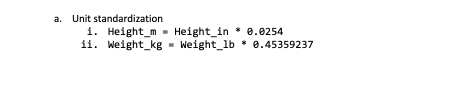

converting the provided height in inches and weight in pounds to height in meters and weight in kilograms:


In [ ]:
df['height_m'] = (df['height_in'] * 0.0254).round(2)
df['weight_kg'] = (df['weight_lb'] * 0.45359237).round(2)
df = df.drop(columns=['height_in', 'weight_lb'])
print(df.head())

   age_years  grip_strength_kg frailty  height_m  weight_kg
0         30              30.0      N       1.67      50.80
1         19              31.0      N       1.82      61.69
2         45              29.0      N       1.76      69.40
3         22              28.0      Y       1.73      64.41
4         29              24.0      Y       1.72      65.32


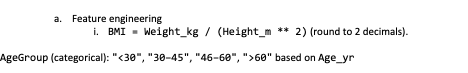

calculating BMI using the weight (kg) and height (m):

In [ ]:
df['bmi'] = (df['weight_kg'] / (df['height_m'] ** 2)).round(2)
print(df.head())

   age_years  grip_strength_kg frailty  height_m  weight_kg    bmi
0         30              30.0      N       1.67      50.80  18.22
1         19              31.0      N       1.82      61.69  18.62
2         45              29.0      N       1.76      69.40  22.40
3         22              28.0      Y       1.73      64.41  21.52
4         29              24.0      Y       1.72      65.32  22.08


Creating age categories based upon years of age:

In [ ]:
bins = [0, 30, 45, 60, float('inf')]
labels = ['<30', '30-45', '45-60', '>60']
df['age_group'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=False)
print(df.head())

   age_years  grip_strength_kg frailty  height_m  weight_kg    bmi age_group
0         30              30.0      N       1.67      50.80  18.22     30-45
1         19              31.0      N       1.82      61.69  18.62       <30
2         45              29.0      N       1.76      69.40  22.40     45-60
3         22              28.0      Y       1.73      64.41  21.52       <30
4         29              24.0      Y       1.72      65.32  22.08       <30


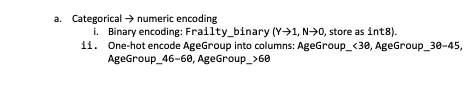

Creating binary encoding for frailty:

In [ ]:
import numpy as np
df['frailty_binary'] = np.where(df['frailty'].str.strip() == 'Y', 1, 0).astype(np.int8)
print(df.head())

   age_years  grip_strength_kg frailty  height_m  weight_kg    bmi age_group  \
0         30              30.0      N       1.67      50.80  18.22     30-45   
1         19              31.0      N       1.82      61.69  18.62       <30   
2         45              29.0      N       1.76      69.40  22.40     45-60   
3         22              28.0      Y       1.73      64.41  21.52       <30   
4         29              24.0      Y       1.72      65.32  22.08       <30   

   frailty_binary  
0               0  
1               0  
2               0  
3               1  
4               1  


One-hot encode for agegroup columns:

In [ ]:
df = pd.get_dummies(df, columns=['age_group'], prefix='age_group')
print(df.head())

   age_years  grip_strength_kg frailty  height_m  weight_kg    bmi  \
0         30              30.0      N       1.67      50.80  18.22   
1         19              31.0      N       1.82      61.69  18.62   
2         45              29.0      N       1.76      69.40  22.40   
3         22              28.0      Y       1.73      64.41  21.52   
4         29              24.0      Y       1.72      65.32  22.08   

   frailty_binary  age_group_<30  age_group_30-45  age_group_45-60  \
0               0          False             True            False   
1               0           True            False            False   
2               0          False            False             True   
3               1           True            False            False   
4               1           True            False            False   

   age_group_>60  
0          False  
1          False  
2          False  
3          False  
4          False  


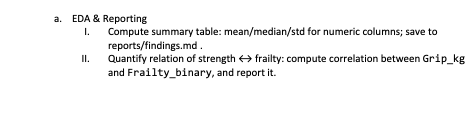

Finding descriptive statistics on all numeric columns:

In [ ]:
summary_table = df.describe().loc[['mean', '50%', 'std']]
print(summary_table)

      age_years  grip_strength_kg  height_m  weight_kg        bmi  \
mean  32.500000         26.000000  1.741000  59.829000  19.716000   
50%   29.500000         27.000000  1.735000  61.690000  19.150000   
std   12.860361          4.521553  0.043063   6.457045   1.793911   

      frailty_binary  
mean        0.400000  
50%         0.000000  
std         0.516398  


The average age of participants is 32.5 years (+/-12.9). Average grip strength for these women was 26kg (+/-4.5). The women were of average height of 1.7m and a healthy average weight of 59.8kg. The average bmi of 19.7 reveals a normal, or healthy weight. The frailty average illustrates that 40% of the women had the presence of frailty symptoms.

Saving the summary table as an .md into my results folder:

In [ ]:
output_path = "/content/drive/MyDrive/5530/results/A1_P1_summary.md"
with open(output_path, "w") as f:
    f.write(summary_table.to_markdown())

print(f"Summary saved as Markdown at: {output_path}")

Summary saved as Markdown at: /content/drive/MyDrive/5530/results/A1_P1_summary.md


Calculating correlations:

In [ ]:
corr = df['grip_strength_kg'].corr(df['frailty_binary'])
print(f"Pearson correlation: {corr:.3f}")

Pearson correlation: -0.476


With a pearson correlation value of -0.476, there is a weak negative correlation between frailty and grip strength. This could suggest that women having a higher grip strength means less frailty.

In [ ]:
cleaned_file_drive = "/content/drive/MyDrive/5530/clean_data/5530_Assignment1_clean.csv"
df.to_csv(cleaned_file_drive, index=False)
print(f"Saved cleaned dataset to Google Drive at {cleaned_file_drive}")

Saved cleaned dataset to Google Drive at /content/drive/MyDrive/5530/clean_data/5530_Assignment1_clean.csv
